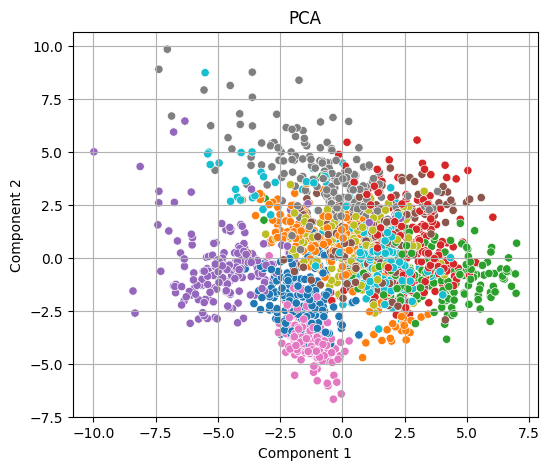

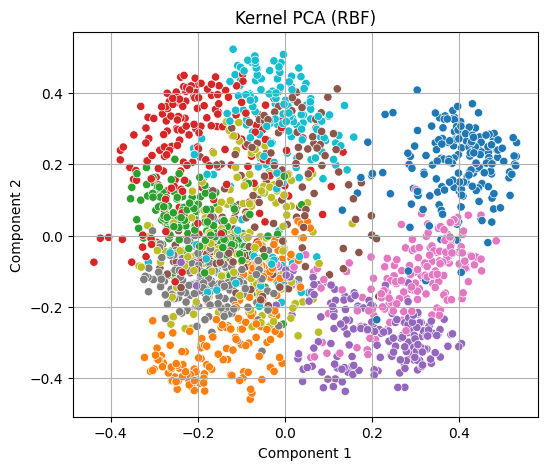

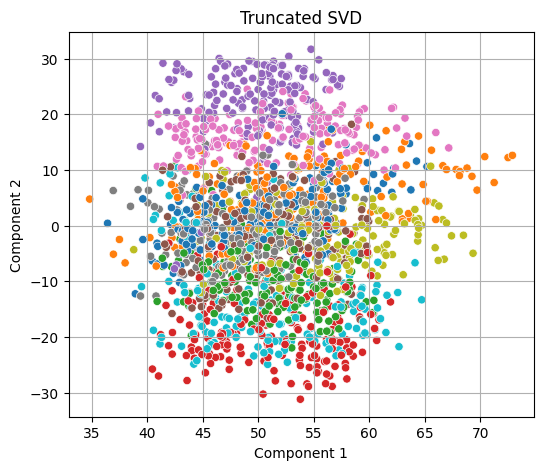

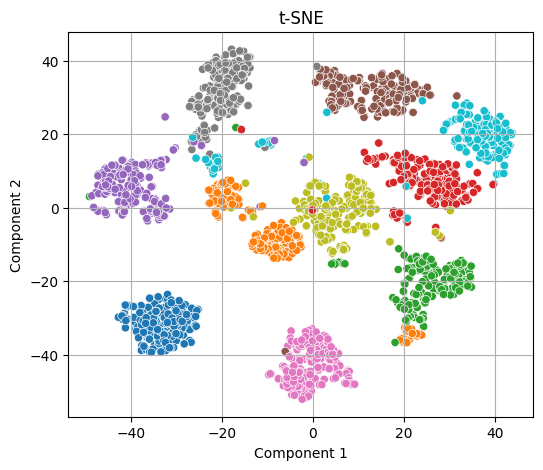

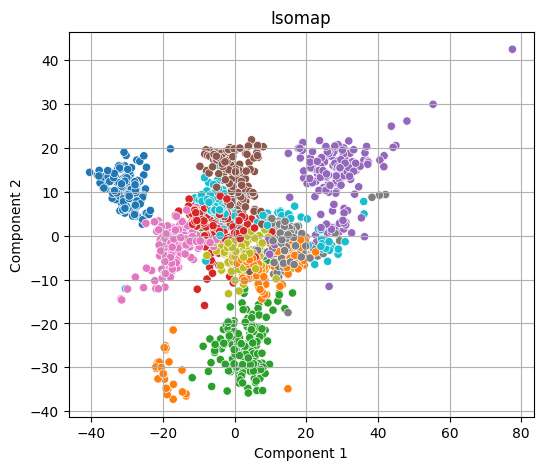

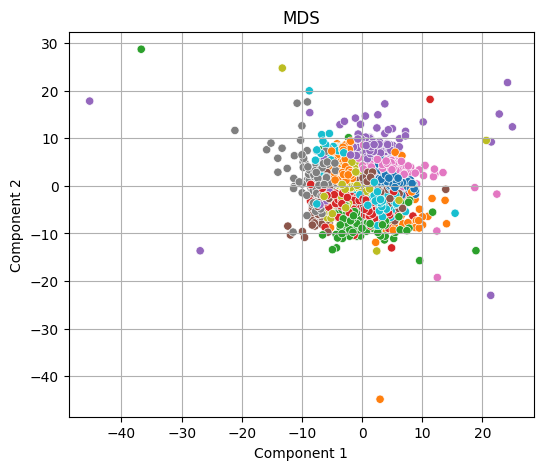

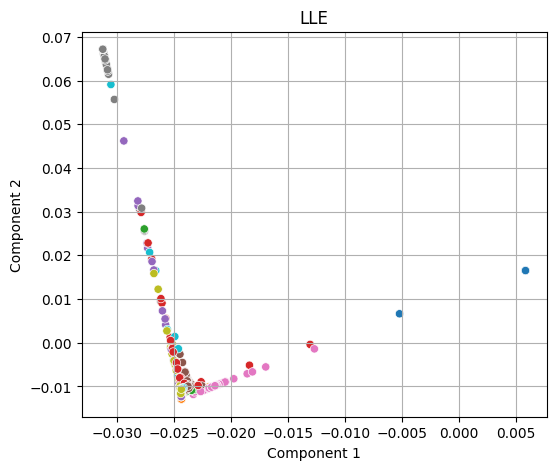

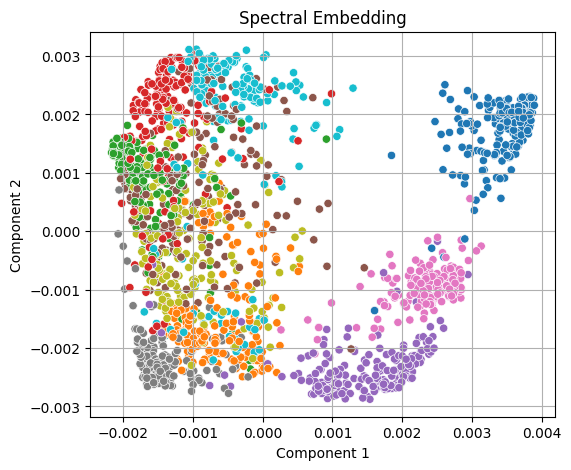

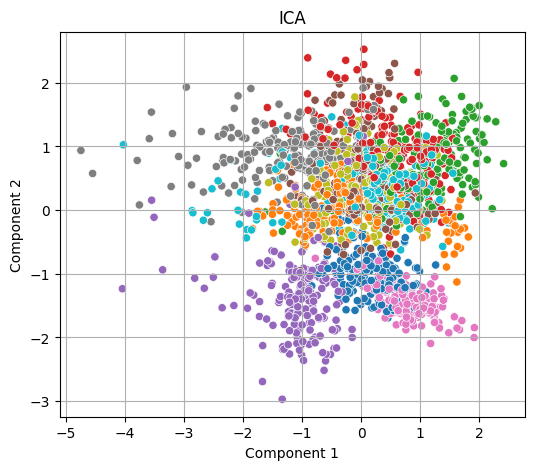

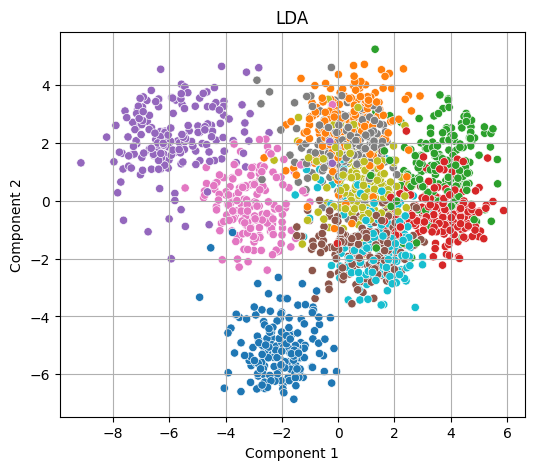

In [1]:
# Dimensionality Reduction: End-to-End Project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA, TruncatedSVD, FastICA
from sklearn.manifold import TSNE, Isomap, MDS, LocallyLinearEmbedding, SpectralEmbedding
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.pipeline import Pipeline

# Load dataset
data = load_digits()
X, y = data.data, data.target

# Standardize
X_scaled = StandardScaler().fit_transform(X)

# Plot helper
def plot_2d(X_proj, title):
    plt.figure(figsize=(6, 5))
    sns.scatterplot(x=X_proj[:, 0], y=X_proj[:, 1], hue=y, palette='tab10', legend=False)
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.grid(True)
    plt.show()

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plot_2d(X_pca, "PCA")

# Kernel PCA
kpca = KernelPCA(n_components=2, kernel='rbf')
X_kpca = kpca.fit_transform(X_scaled)
plot_2d(X_kpca, "Kernel PCA (RBF)")

# Truncated SVD
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X)
plot_2d(X_svd, "Truncated SVD")

# t-SNE
tsne = TSNE(n_components=2, random_state=0, init='pca', learning_rate='auto')
X_tsne = tsne.fit_transform(X_scaled)
plot_2d(X_tsne, "t-SNE")

# Isomap
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X_scaled)
plot_2d(X_isomap, "Isomap")

# MDS
mds = MDS(n_components=2, random_state=0)
X_mds = mds.fit_transform(X_scaled)
plot_2d(X_mds, "MDS")

# LLE
lle = LocallyLinearEmbedding(n_components=2)
X_lle = lle.fit_transform(X_scaled)
plot_2d(X_lle, "LLE")

# Spectral Embedding
se = SpectralEmbedding(n_components=2)
X_se = se.fit_transform(X_scaled)
plot_2d(X_se, "Spectral Embedding")

# ICA
ica = FastICA(n_components=2, random_state=0)
X_ica = ica.fit_transform(X_scaled)
plot_2d(X_ica, "ICA")

# LDA (Supervised, so we use y)
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)
plot_2d(X_lda, "LDA")




---

## Core Comparative & Review Studies

* **"Conceptual and empirical comparison of dimensionality reduction algorithms (PCA, KPCA, LDA, MDS, SVD, LLE, Isomap, LE, ICA, t‑SNE)"** by Anowar, Sadaoui, and Selim (2021) — offers both conceptual insights and empirical benchmarking of nearly all methods you included ([ScienceDirect][1]).

* **“Comparative study of unsupervised dimension reduction techniques”** (circa 2009/2010) — finds that in two- and three-dimensional embedding, **LLE** and **Isomap** often outperform **PCA**, especially in clustering tasks; PCA, Kernel PCA, and Diffusion Maps appear more robust to noise ([PMC][2]).

---

## Technique-Specific Surveys & Tutorials

* **"Linear Dimensionality Reduction: Survey, Insights, and ..."** (Cunningham & Ghahramani, 2015) — an in-depth survey of linear techniques like PCA and SVD, analyzing their interpretations, objectives, and computational traits ([jmlr.org][3]).

* **"Locally Linear Embedding and its Variants: Tutorial and Survey"** (Ghojogh, Ghodsi, et al., 2020) — a thorough tutorial and survey of **LLE** and its extensions: kernel versions, streaming and big-data variants, supervised variants, and more ([arXiv][4]).

* **"A Survey: Potential Dimensionality Reduction Methods"** (Chang, 2025) — reviews PCA, Kernel PCA (including sparse KPCA), **t‑SNE**, and **UMAP**, articulating trade-offs among interpretability, structure preservation, and computation ([arXiv][5]).

---

## Applications & Contextual Demonstrations

* **"Empirical comparison between autoencoders and traditional dimensionality reduction methods"** (Fournier & Aloise, 2021) — compares PCA, Isomap, and autoencoders on image datasets (MNIST, Fashion‑MNIST, CIFAR‑10), showing that PCA remains competitive and far faster ([arXiv][6]).

* **"Reducing the Dimensionality of Data: Locally Linear Embedding of Sloan Galaxy Spectra"** (VanderPlas & Connolly, 2009) — applied **LLE** to astronomical data, demonstrating better classification compared to PCA with minimal computational overhead ([arXiv][7]).

---

## Domain‑Specific & Visualization‑Focused Analyses

* **"A review paper on dimensionality reduction techniques"** (\~2022–2023) — a general comparative review covering matrix factorization, autoencoders, manifold learning, etc. ([pnrjournal.com][8]).

* **"Comparative Analysis of Dimensionality Reduction Using PCA and LDA for Classification on Diagnostic Data"** (Dimgba et al., June 2024) — compares PCA and LDA in a medical diagnostic context (Wisconsin Breast Cancer dataset) using Random Forest classifiers ([ResearchGate][9]).

* **"A Comparison for Dimensionality Reduction Methods of Single‑Cell ..."** (roughly 2021–2022) — compares t‑SNE and UMAP on single-cell data, finding t‑SNE highest in accuracy but UMAP higher in stability and computational scalability ([PMC][10]).

* **“A critical analysis of the usage of dimensionality reduction in scientific domains outside of computer science”** (arXiv, March 2025) — examines how DR methods (like PCA, t-SNE, UMAP) are used across scientific fields, and identifies gaps between algorithm design and domain-specific workflows ([arXiv][11]).

---

## Historical Algorithm-Centric Paper

* **Tenenbaum et al., 2000**, "A Global Geometric Framework for Nonlinear Dimensionality Reduction" — the foundational paper introducing **Isomap**, a nonlinear method preserving geodesic distances on manifold structures ([en.wikipedia.org][12]).

---

### Summary Table: Key Contributions

| Method / Paper Focus                    | Contribution Highlights                                                              |
| --------------------------------------- | ------------------------------------------------------------------------------------ |
| Anowar et al. (2021)                    | Empirical & conceptual comparison of all methods used in your project                |
| Unsupervised study (circa 2009)         | LLE & Isomap outperform PCA for clustering in low dims; PCA more robust to noise     |
| Cunningham & Ghahramani (2015)          | Deep survey of linear DR methods                                                     |
| Ghojogh et al. (2020)                   | Detailed survey on LLE and variants                                                  |
| Chang (2025)                            | Modern comparison including t-SNE & UMAP                                             |
| Fournier & Aloise (2021)                | PCA vs. autoencoders — PCA remains competitive and efficient                         |
| VanderPlas & Connolly (2009)            | Practical success of LLE in astronomy vs. PCA                                        |
| Dimgba et al. (2024)                    | PCA vs LDA in classification tasks in healthcare diagnostics                         |
| Single‑Cell comparison (2021–2022)      | t-SNE vs UMAP: t-SNE more accurate, UMAP more stable and scalable                    |
| Tenenbaum et al. (2000)                 | Introduced Isomap — key foundational algorithm                                       |
| Chang (2025) & domain-critical analysis | Provides context for applying DR across disciplines and choosing appropriate methods |

---

[1]: https://www.sciencedirect.com/science/article/abs/pii/S1574013721000186?utm_source=chatgpt.com "Conceptual and empirical comparison of dimensionality reduction ..."
[2]: https://pmc.ncbi.nlm.nih.gov/articles/PMC2998530/?utm_source=chatgpt.com "Comparative study of unsupervised dimension reduction techniques ..."
[3]: https://jmlr.org/papers/volume16/cunningham15a/cunningham15a.pdf?utm_source=chatgpt.com "[PDF] Linear Dimensionality Reduction: Survey, Insights, and ..."
[4]: https://arxiv.org/abs/2011.10925?utm_source=chatgpt.com "Locally Linear Embedding and its Variants: Tutorial and Survey"
[5]: https://arxiv.org/abs/2502.11036?utm_source=chatgpt.com "A Survey: Potential Dimensionality Reduction Methods"
[6]: https://arxiv.org/abs/2103.04874?utm_source=chatgpt.com "Empirical comparison between autoencoders and traditional dimensionality reduction methods"
[7]: https://arxiv.org/abs/0907.2238?utm_source=chatgpt.com "Reducing the Dimensionality of Data: Locally Linear Embedding of Sloan Galaxy Spectra"
[8]: https://www.pnrjournal.com/index.php/home/article/download/1035/819/1229?utm_source=chatgpt.com "[PDF] A Review Paper on Dimensionality Reduction Techniques"
[9]: https://www.researchgate.net/publication/381554115_Comparative_Analysis_of_DImensionality_Reduction_Using_PCA_and_LDA_for_Classification_on_Diagnostic_Data?utm_source=chatgpt.com "Comparative Analysis of DImensionality Reduction Using PCA and ..."
[10]: https://pmc.ncbi.nlm.nih.gov/articles/PMC8021860/?utm_source=chatgpt.com "A Comparison for Dimensionality Reduction Methods of Single-Cell ..."
[11]: https://arxiv.org/html/2503.08836v1?utm_source=chatgpt.com "A Critical Analysis of the Usage of Dimensionality Reduction in Four ..."
[12]: https://en.wikipedia.org/wiki/Isomap?utm_source=chatgpt.com "Isomap"
